In [1]:
#!wget https://github.com/Emirhankayar/churnpred/raw/refs/heads/main/data.xlsx

# Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002.0,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003.0,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004.0,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5628 non-null   float64
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5628 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# Explorative Analysis

In [5]:
df.describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
CustomerID,5628.0,52814.549041,1624.890759,50001.0,50057.27,50563.70,51407.75,52814.50,54221.2500,55065.30,55346.6500,55573.7300,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.00,0.00,0.0000,1.00,1.0000,1.0000,1.0
Tenure,5366.0,10.189899,8.557241,0.0,0.00,1.00,2.00,9.00,16.0000,23.00,27.0000,30.0000,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,1.00,1.00,3.0000,3.00,3.0000,3.0000,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,6.00,7.00,9.00,14.00,20.0000,30.00,33.0000,35.0000,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,2.00,2.00,3.00,3.0000,4.00,4.0000,4.0000,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,1.00,3.00,3.00,4.00,4.0000,5.00,5.0000,6.0000,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,1.00,1.00,2.00,3.00,4.0000,5.00,5.0000,5.0000,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,1.00,2.00,2.00,3.00,6.0000,8.00,10.0000,11.0000,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,0.00,0.00,1.0000,1.00,1.0000,1.0000,1.0


In [6]:
# break variables into categorical and numerical
categorical_cols = (df.dtypes[df.dtypes == 'object'].index)
numerical_cols = (df.dtypes[df.dtypes != 'object'].index).drop('CustomerID')

In [ ]:
# Check unique values of each column
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df[column].unique()))
        print("="*80)

Column: PreferredLoginDevice - Unique Values: ['Mobile Phone' 'Phone' 'Computer' 'N.A.']
Column: PreferredPaymentMode - Unique Values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Column: Gender - Unique Values: ['Female' 'Male' nan]
Column: PreferedOrderCat - Unique Values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Column: MaritalStatus - Unique Values: ['Single' 'Divorced' 'Married' 'Widow']


In [8]:
for column in numerical_cols:
        print("Column: {} - Unique Values: {}".format(column, df[column].unique()))
        print("="*80)

Column: Churn - Unique Values: [1 0]
Column: Tenure - Unique Values: [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Column: CityTier - Unique Values: [3 1 2]
Column: WarehouseToHome - Unique Values: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
Column: HourSpendOnApp - Unique Values: [ 3.  2. nan  1.  0.  4.  5.]
Column: NumberOfDeviceRegistered - Unique Values: [3 4 5 2 1 6]
Column: SatisfactionScore - Unique Values: [2 3 5 4 1]
Column: NumberOfAddress - Unique Values: [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Column: Complain - Unique Values: [1 0]
Column: OrderAmountHikeFromlastYear - Unique Values: [11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]
Column: CouponUsed - Unique Values: [ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 

# Observations of Categorical Data

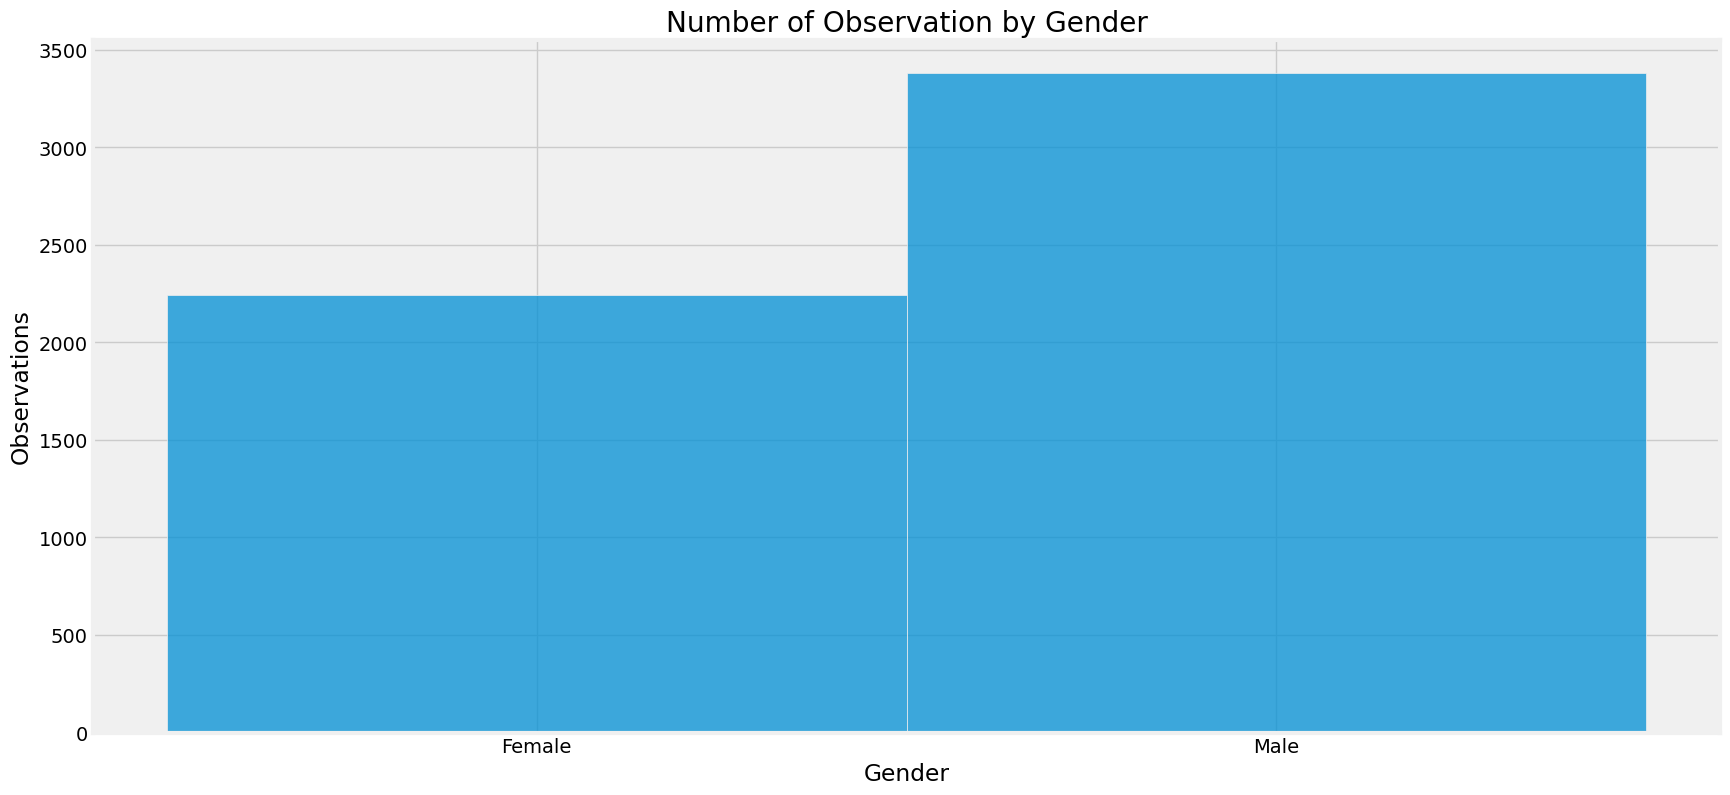

In [9]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Observations')
plt.title('Number of Observation by Gender')
plt.show()

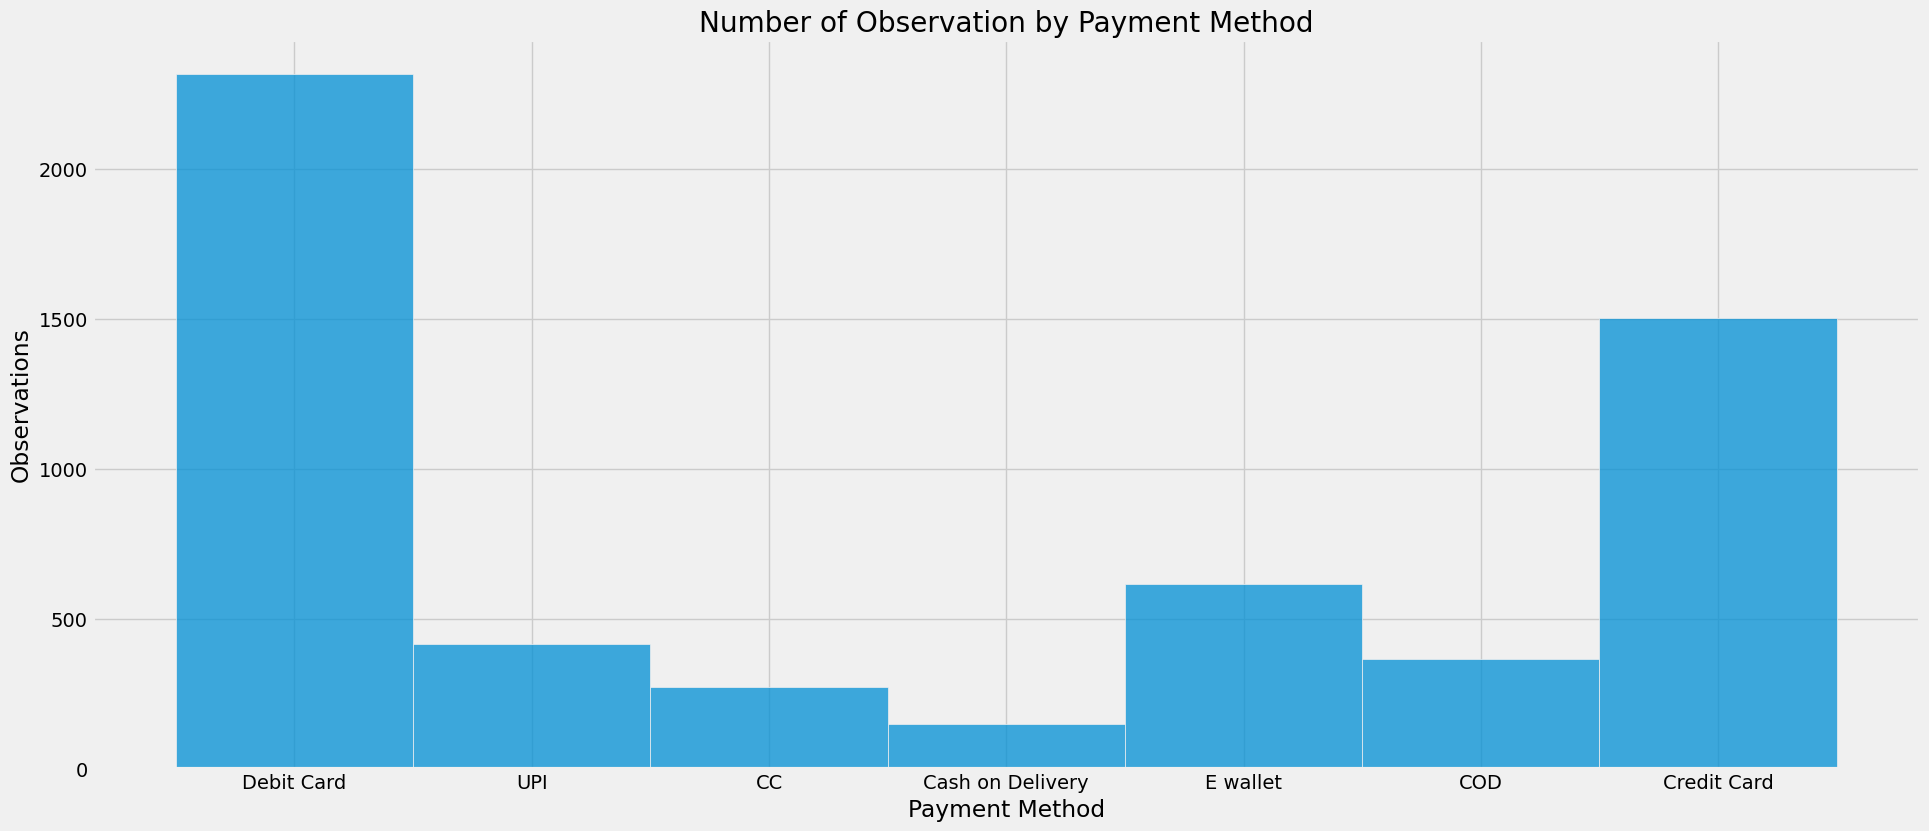

In [10]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='PreferredPaymentMode', data=df.fillna('NA'))
plt.xlabel('Payment Method')
plt.ylabel('Observations')
plt.title('Number of Observation by Payment Method')
plt.show()

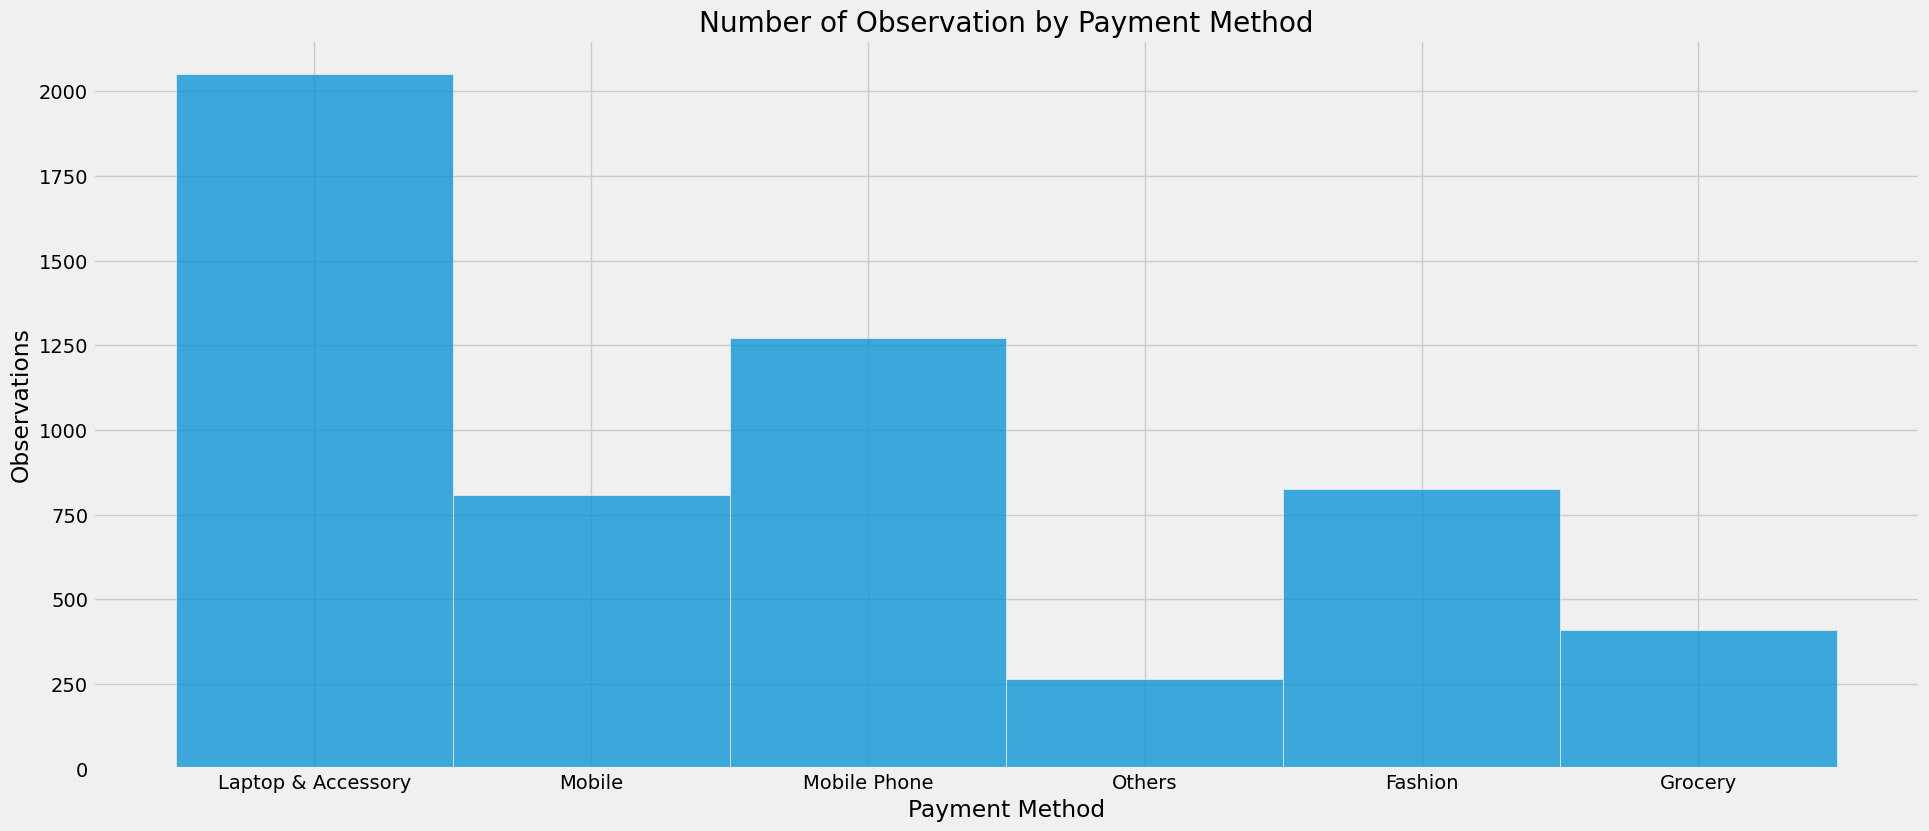

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='PreferedOrderCat', data=df.fillna('NA'))
plt.xlabel('PreferedOrderCat')
plt.ylabel('Observations')
plt.title('Number of Observation by PreferedOrderCat')
plt.show()

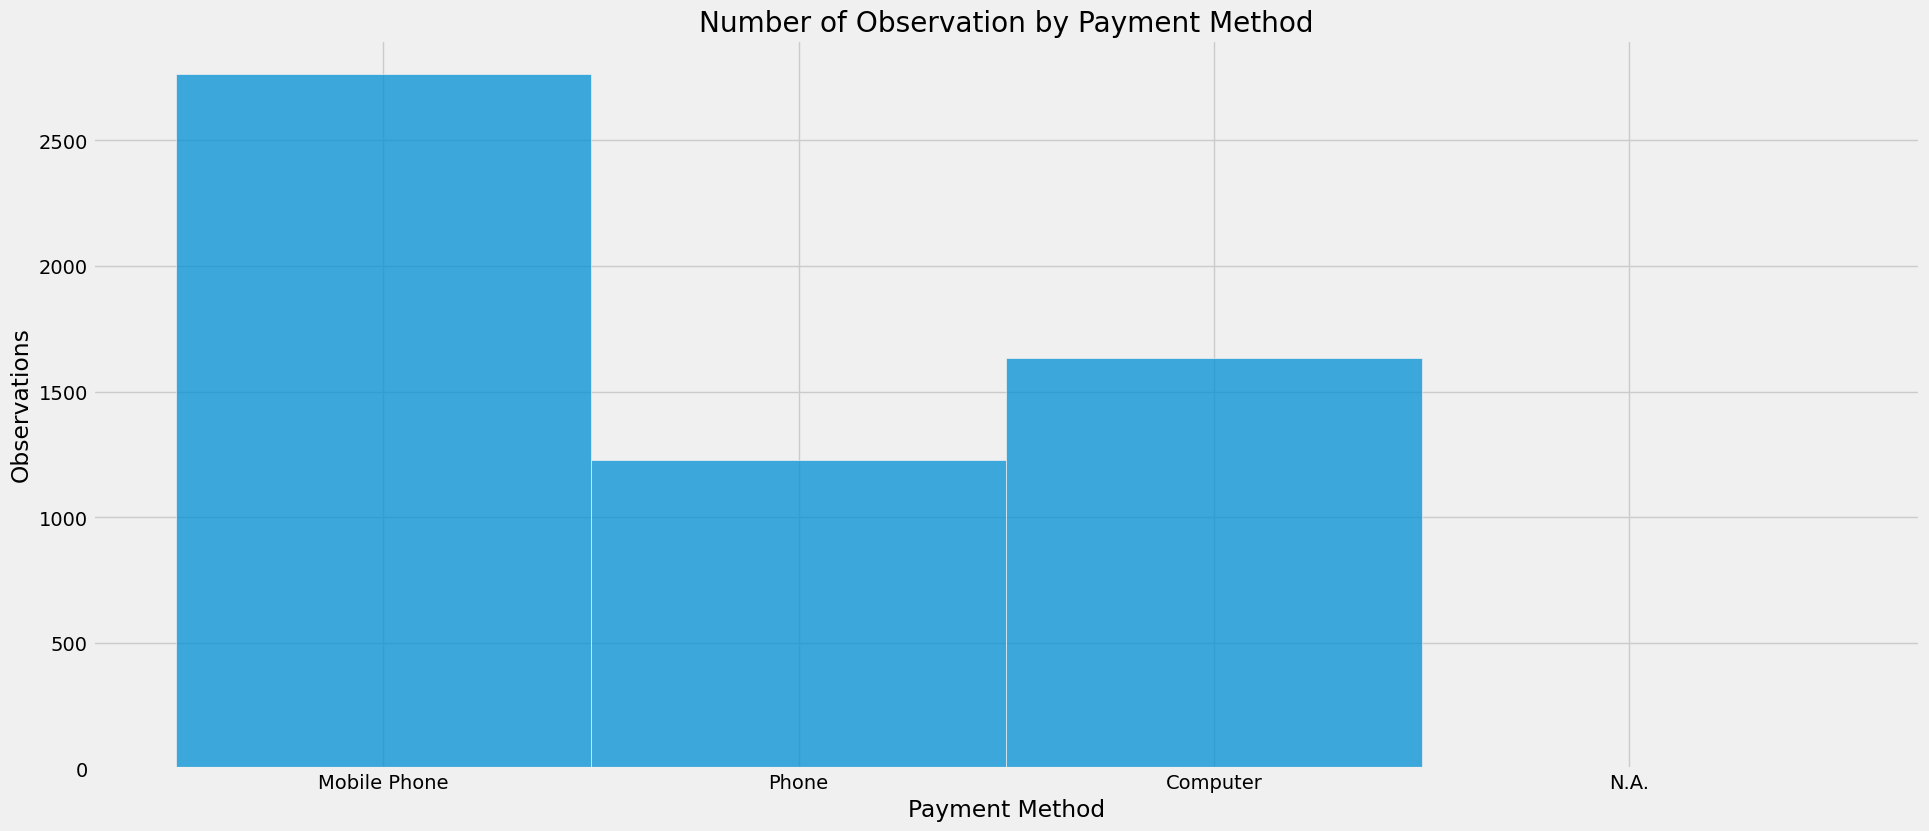

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='PreferredLoginDevice', data=df.fillna('NA'))
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Observations')
plt.title('Number of Observation by PreferredLoginDevice')
plt.show()

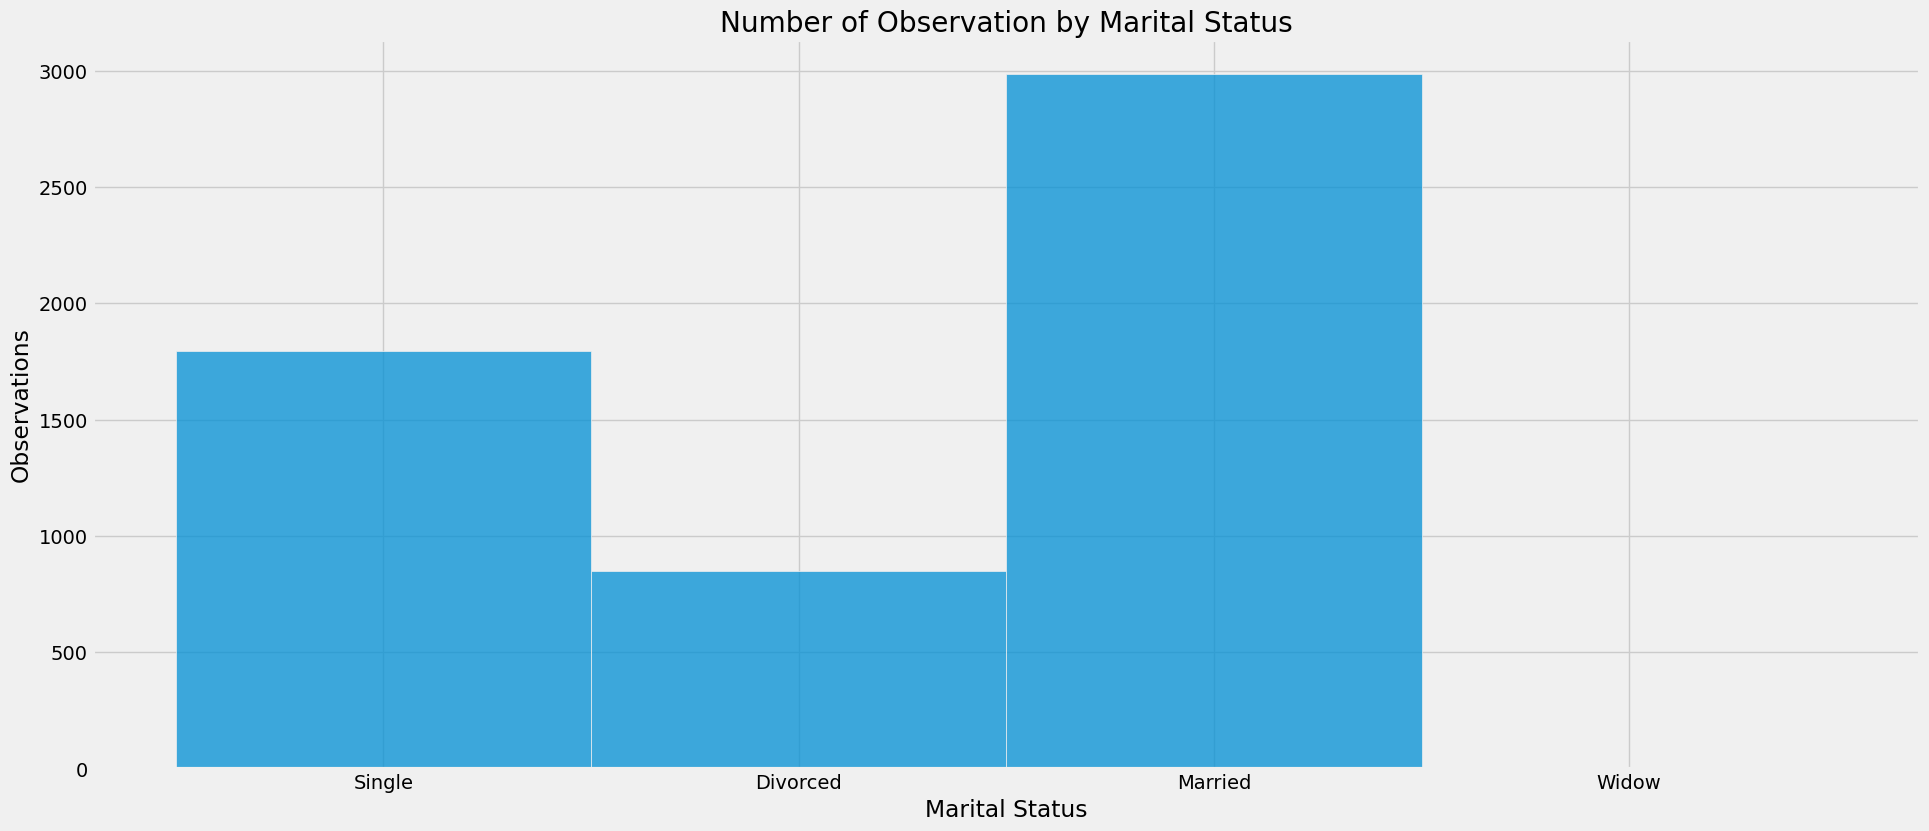

In [13]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='MaritalStatus', data=df.fillna('NA'))
plt.xlabel('Marital Status')
plt.ylabel('Observations')
plt.title('Number of Observation by Marital Status')
plt.show()

In [14]:
df[numerical_cols].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.00,0.00,0.0000,1.00,1.0000,1.0000,1.0
Tenure,5366.0,10.189899,8.557241,0.0,0.00,1.00,2.00,9.00,16.0000,23.00,27.0000,30.0000,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,1.00,1.00,3.0000,3.00,3.0000,3.0000,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,6.00,7.00,9.00,14.00,20.0000,30.00,33.0000,35.0000,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,2.00,2.00,3.00,3.0000,4.00,4.0000,4.0000,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,1.00,3.00,3.00,4.00,4.0000,5.00,5.0000,6.0000,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,1.00,1.00,2.00,3.00,4.0000,5.00,5.0000,5.0000,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,1.00,2.00,2.00,3.00,6.0000,8.00,10.0000,11.0000,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,0.00,0.00,1.0000,1.00,1.0000,1.0000,1.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,11.00,12.00,13.00,15.00,18.0000,21.00,23.0000,25.0000,26.0


# Observations of Numerical Data

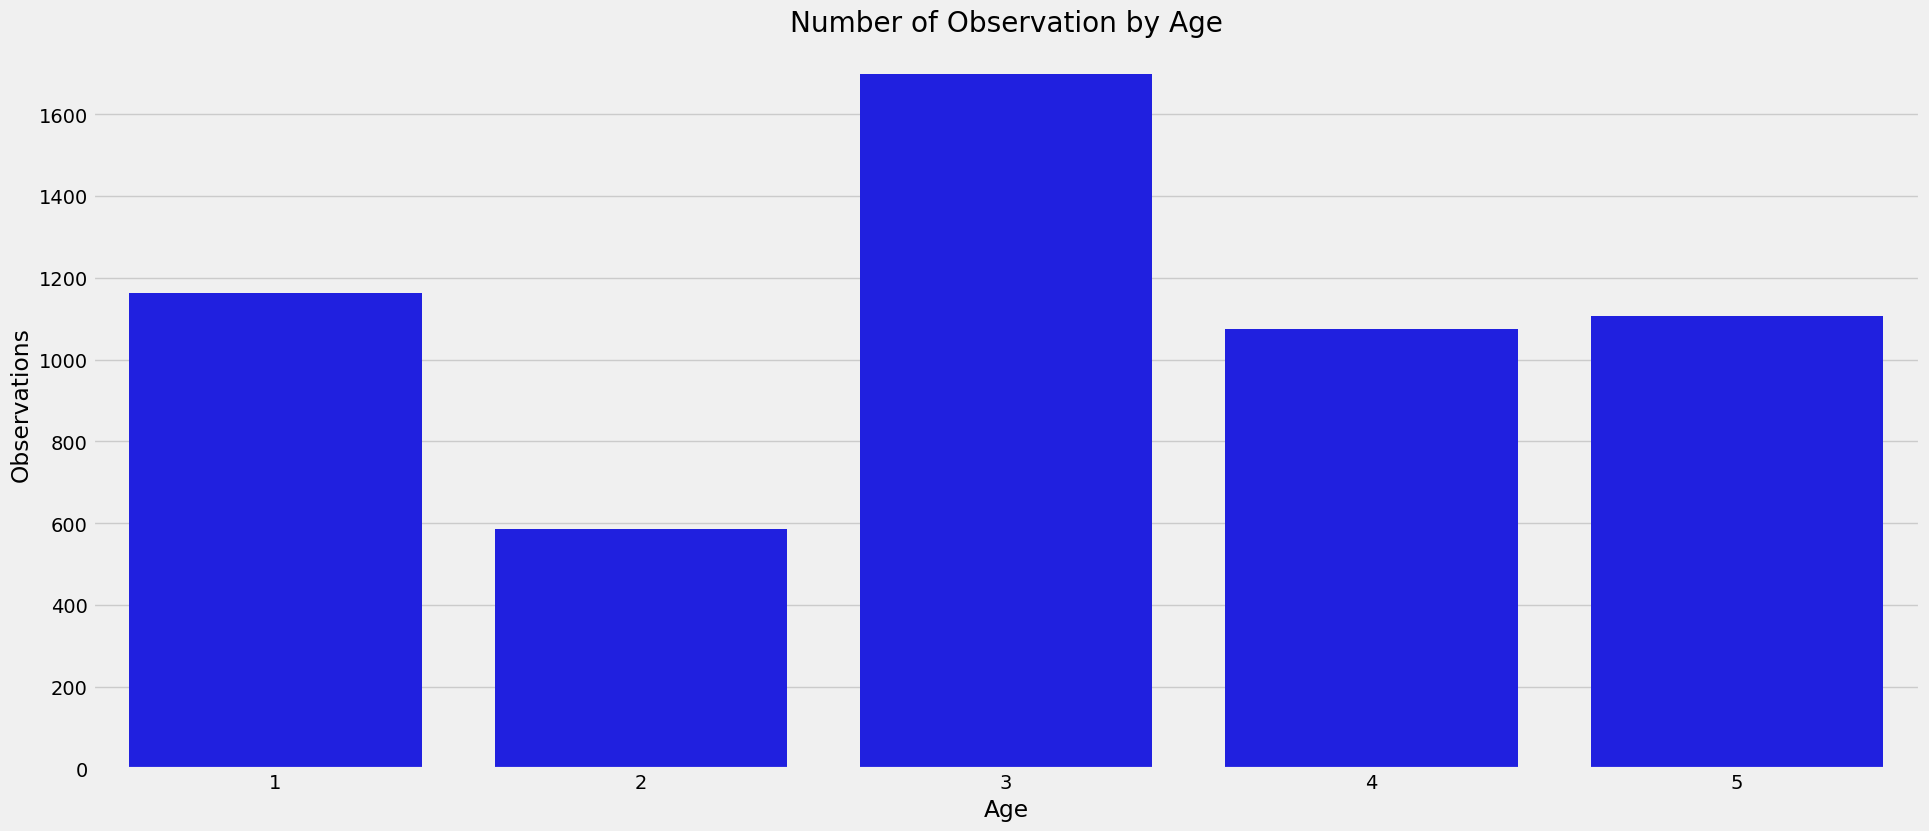

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='SatisfactionScore', data=df, color='blue')
plt.xlabel('SatisfactionScore')
plt.ylabel('Observations')
plt.title('Number of Observation by SatisfactionScore')
plt.show()

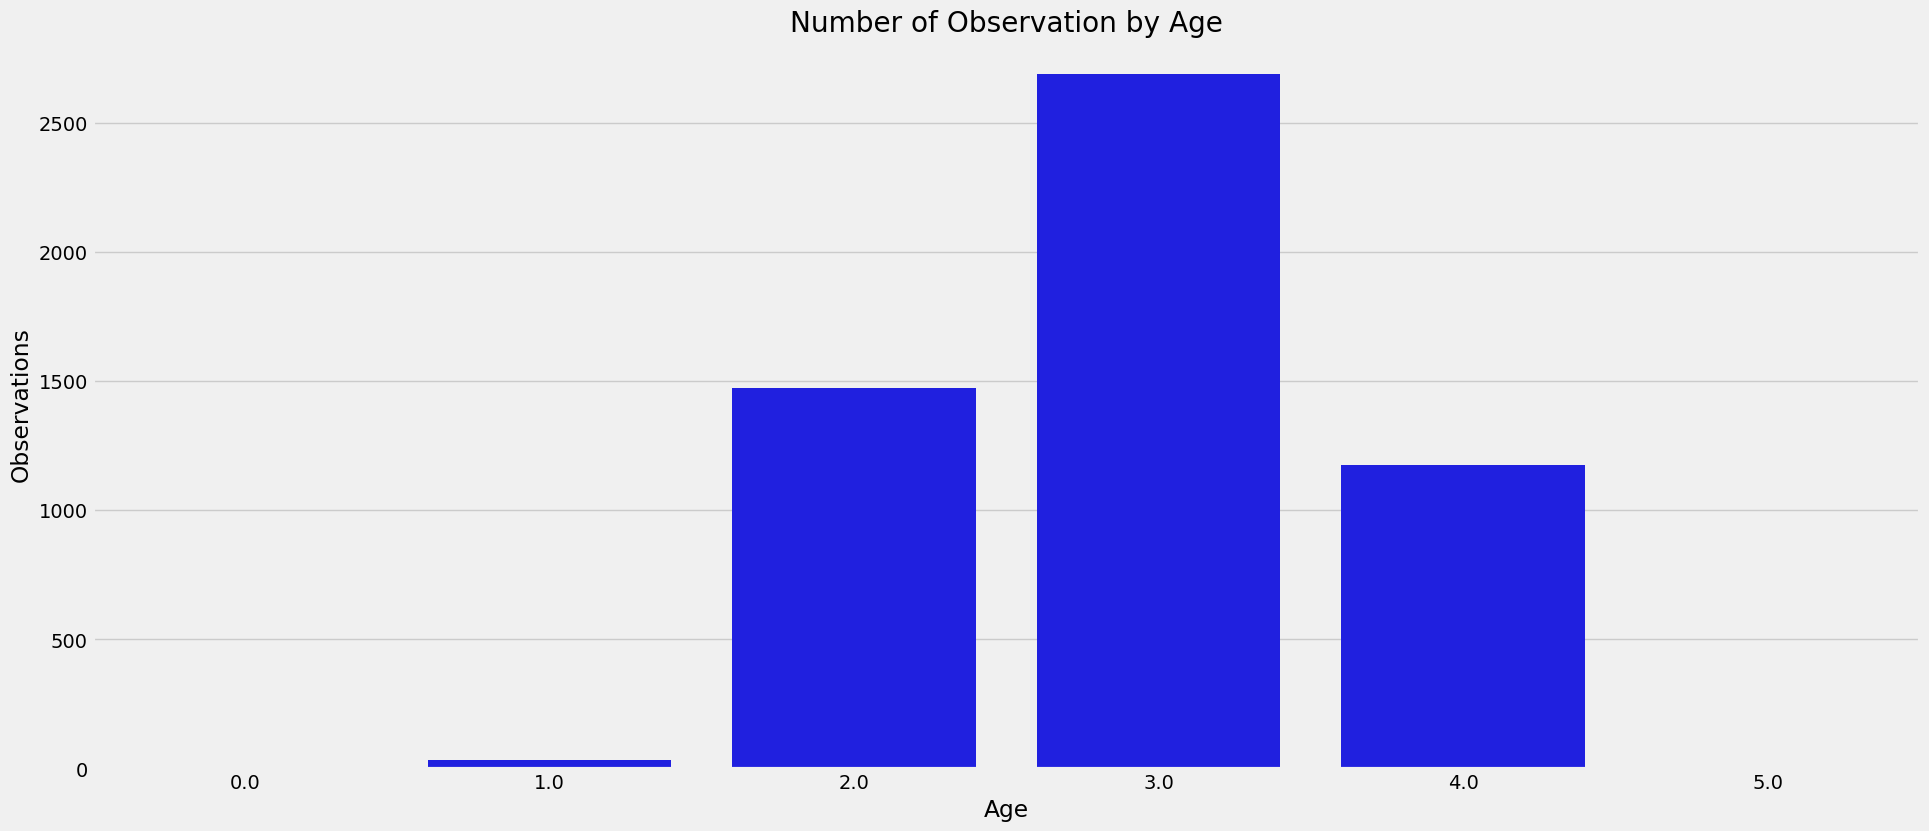

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='HourSpendOnApp', data=df, color='blue')
plt.xlabel('HourSpendOnApp')
plt.ylabel('Observations')
plt.title('Number of Observation by HourSpendOnApp')
plt.show()

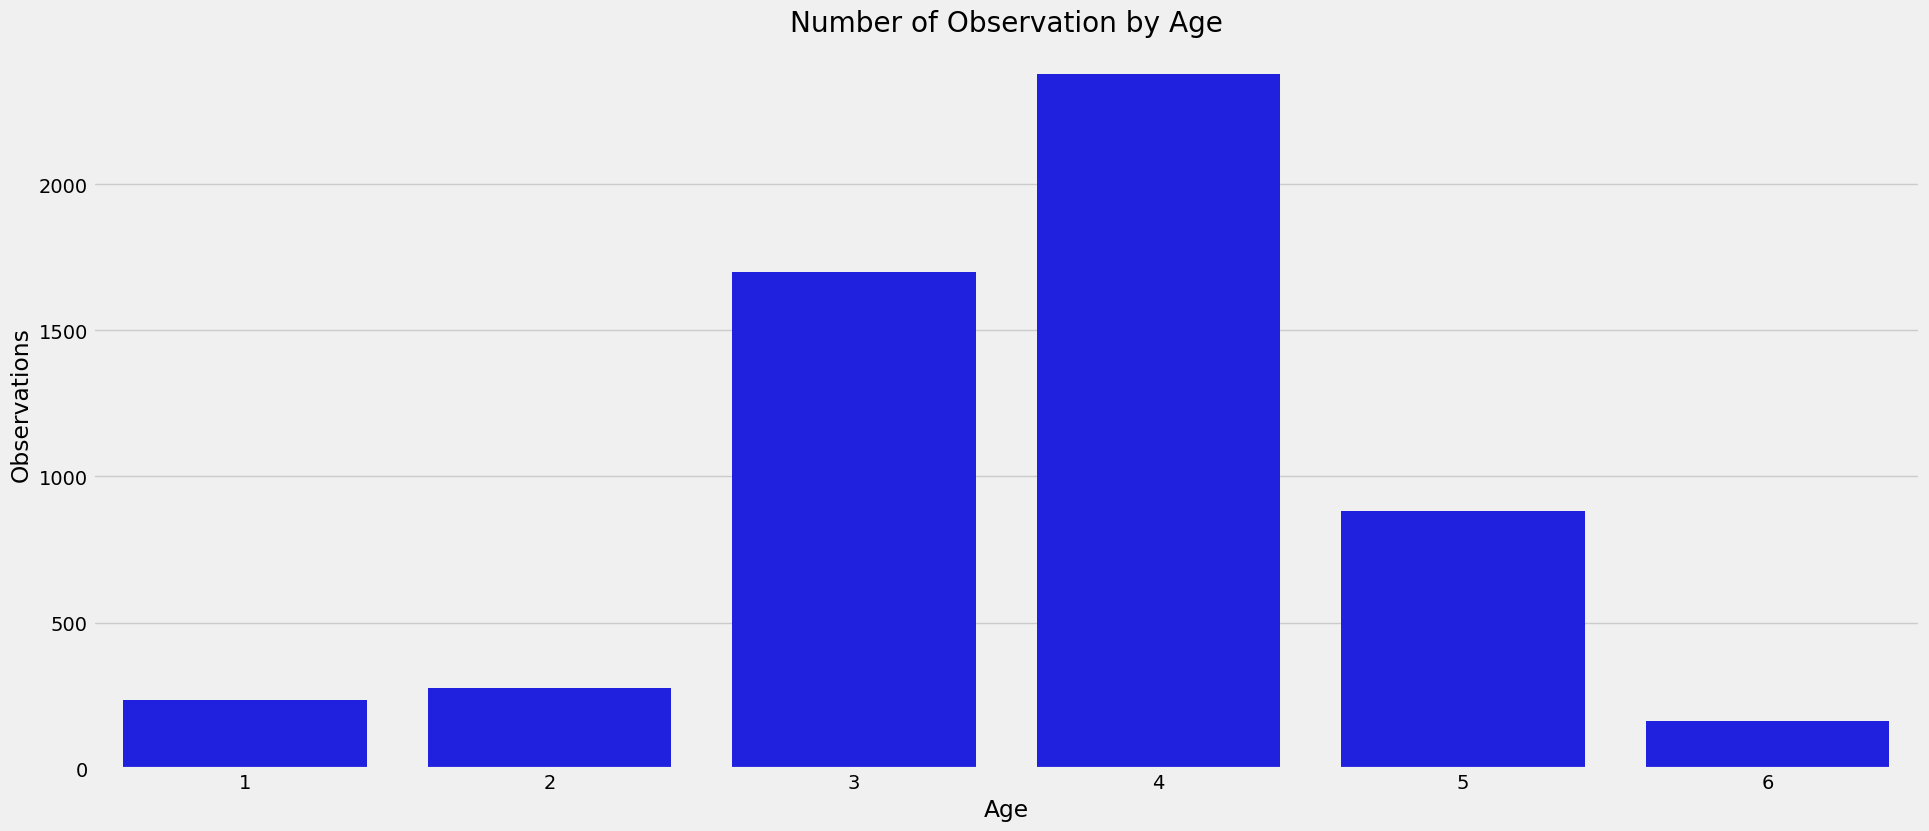

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='NumberOfDeviceRegistered', data=df, color='blue')
plt.xlabel('NumberOfDeviceRegistered')
plt.ylabel('Observations')
plt.title('Number of Observation by NumberOfDeviceRegistered')
plt.show()

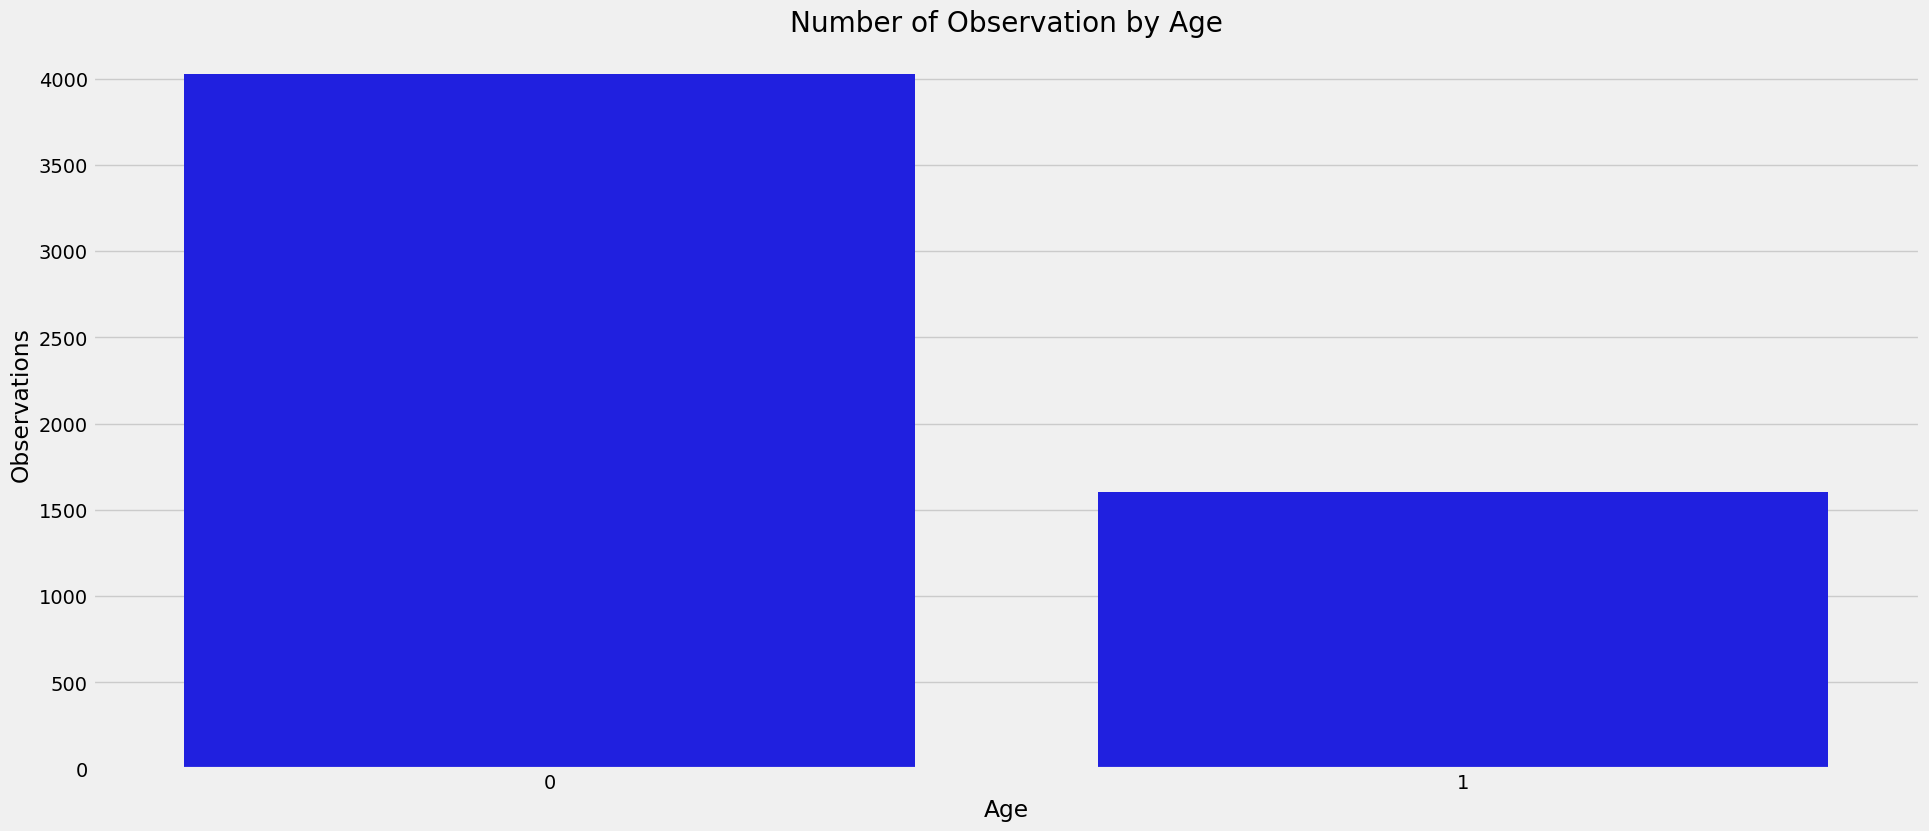

In [18]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='Complain', data=df, color='blue')
plt.xlabel('Age')
plt.ylabel('Observations')
plt.title('Number of Observation by Age')
plt.show()

# Handle Missing Data

In [20]:
df.dropna(subset=['CustomerID', 'Gender'], inplace=True) # missing very less amount
df_clean = df.copy()

In [25]:
numerical_cols_with_null = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'OrderAmountHikeFromlastYear', 'CouponUsed',
    'OrderCount', 'DaySinceLastOrder'
]

for col in numerical_cols_with_null:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)
    print(f"Filled missing values in '{col}' with median: {median_val}")

Filled missing values in 'Tenure' with median: 9.0
Filled missing values in 'WarehouseToHome' with median: 14.0
Filled missing values in 'HourSpendOnApp' with median: 3.0
Filled missing values in 'OrderAmountHikeFromlastYear' with median: 15.0
Filled missing values in 'CouponUsed' with median: 1.0
Filled missing values in 'OrderCount' with median: 2.0
Filled missing values in 'DaySinceLastOrder' with median: 3.0


In [26]:
df_clean = df_clean[df_clean['PreferredLoginDevice'] != 'N.A.'].copy()

In [27]:
df_clean.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [28]:
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df_clean[column].unique()))
        print("="*80)

Column: PreferredLoginDevice - Unique Values: ['Mobile Phone' 'Phone' 'Computer']
Column: PreferredPaymentMode - Unique Values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Column: Gender - Unique Values: ['Female' 'Male']
Column: PreferedOrderCat - Unique Values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Column: MaritalStatus - Unique Values: ['Single' 'Divorced' 'Married' 'Widow']


# Apply encoding to the categorical

In [29]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'PreferedOrderCat',
    'MaritalStatus',
    'Gender'
]

le = LabelEncoder()

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))


In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5621 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5621 non-null   float64
 1   Churn                        5621 non-null   int64  
 2   Tenure                       5621 non-null   float64
 3   PreferredLoginDevice         5621 non-null   int64  
 4   CityTier                     5621 non-null   int64  
 5   WarehouseToHome              5621 non-null   float64
 6   PreferredPaymentMode         5621 non-null   int64  
 7   Gender                       5621 non-null   int64  
 8   HourSpendOnApp               5621 non-null   float64
 9   NumberOfDeviceRegistered     5621 non-null   int64  
 10  PreferedOrderCat             5621 non-null   int64  
 11  SatisfactionScore            5621 non-null   int64  
 12  MaritalStatus                5621 non-null   int64  
 13  NumberOfAddress        

# Scale

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_clean.drop(columns=['CustomerID']))
df_clean_scaled = pd.DataFrame(cluster_scaled, columns=df_clean.drop(columns=['CustomerID']).columns)

In [32]:
df_clean_scaled.describe()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03
mean,-1.011269e-17,-5.056344e-18,7.078882e-17,1.305169e-16,2.528172e-17,2.022538e-17,-1.042871e-17,2.427045e-16,1.213523e-16,-1.011269e-17,-1.567467e-16,-2.224791e-16,-6.067613e-17,5.751591e-17,1.719157e-16,-6.067613e-17,5.056344e-17,7.078882e-17,3.160215e-18
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00
min,-4.501224e-01,-1.212703e+00,-1.308701e+00,-7.147984e-01,-1.266338e+00,-2.552244e+00,-1.226744e+00,-4.160592e+00,-2.630853e+00,-1.678818e+00,-1.498078e+00,-1.756001e+00,-1.244147e+00,-6.305263e-01,-1.302019e+00,-9.245212e-01,-6.816928e-01,-1.249113e+00,-2.826495e-02
25%,-4.501224e-01,-8.538149e-01,-1.308701e+00,-7.147984e-01,-7.870053e-01,-3.941690e-01,-1.226744e+00,-1.325498e+00,-6.750238e-01,-2.617993e-01,-7.734675e-01,-2.545587e-01,-8.572614e-01,-6.305263e-01,-7.451925e-01,-3.863342e-01,-6.816928e-01,-6.891142e-01,-2.053435e-02
50%,-4.501224e-01,-1.360383e-01,1.005343e-01,-7.147984e-01,-1.878401e-01,3.251894e-01,8.151657e-01,9.204849e-02,3.028908e-01,-2.617993e-01,-4.885737e-02,-2.545587e-01,-4.703753e-01,-6.305263e-01,-1.883660e-01,-3.863342e-01,-3.344841e-01,-4.091149e-01,-1.960309e-02
75%,-4.501224e-01,5.817383e-01,1.005343e-01,1.470615e+00,5.311582e-01,3.251894e-01,8.151657e-01,9.204849e-02,3.028908e-01,1.155219e+00,6.757528e-01,1.246883e+00,6.902830e-01,1.585977e+00,6.468736e-01,1.518528e-01,1.272460e-02,7.108826e-01,-1.784771e-02
max,2.221618e+00,6.084692e+00,1.509769e+00,1.470615e+00,1.335329e+01,1.763906e+00,8.151657e-01,2.927142e+00,2.258720e+00,1.863729e+00,1.400363e+00,2.748325e+00,6.880460e+00,1.585977e+00,2.874179e+00,7.686470e+00,4.526438e+00,1.163086e+01,5.300454e+01


# Cluster the data

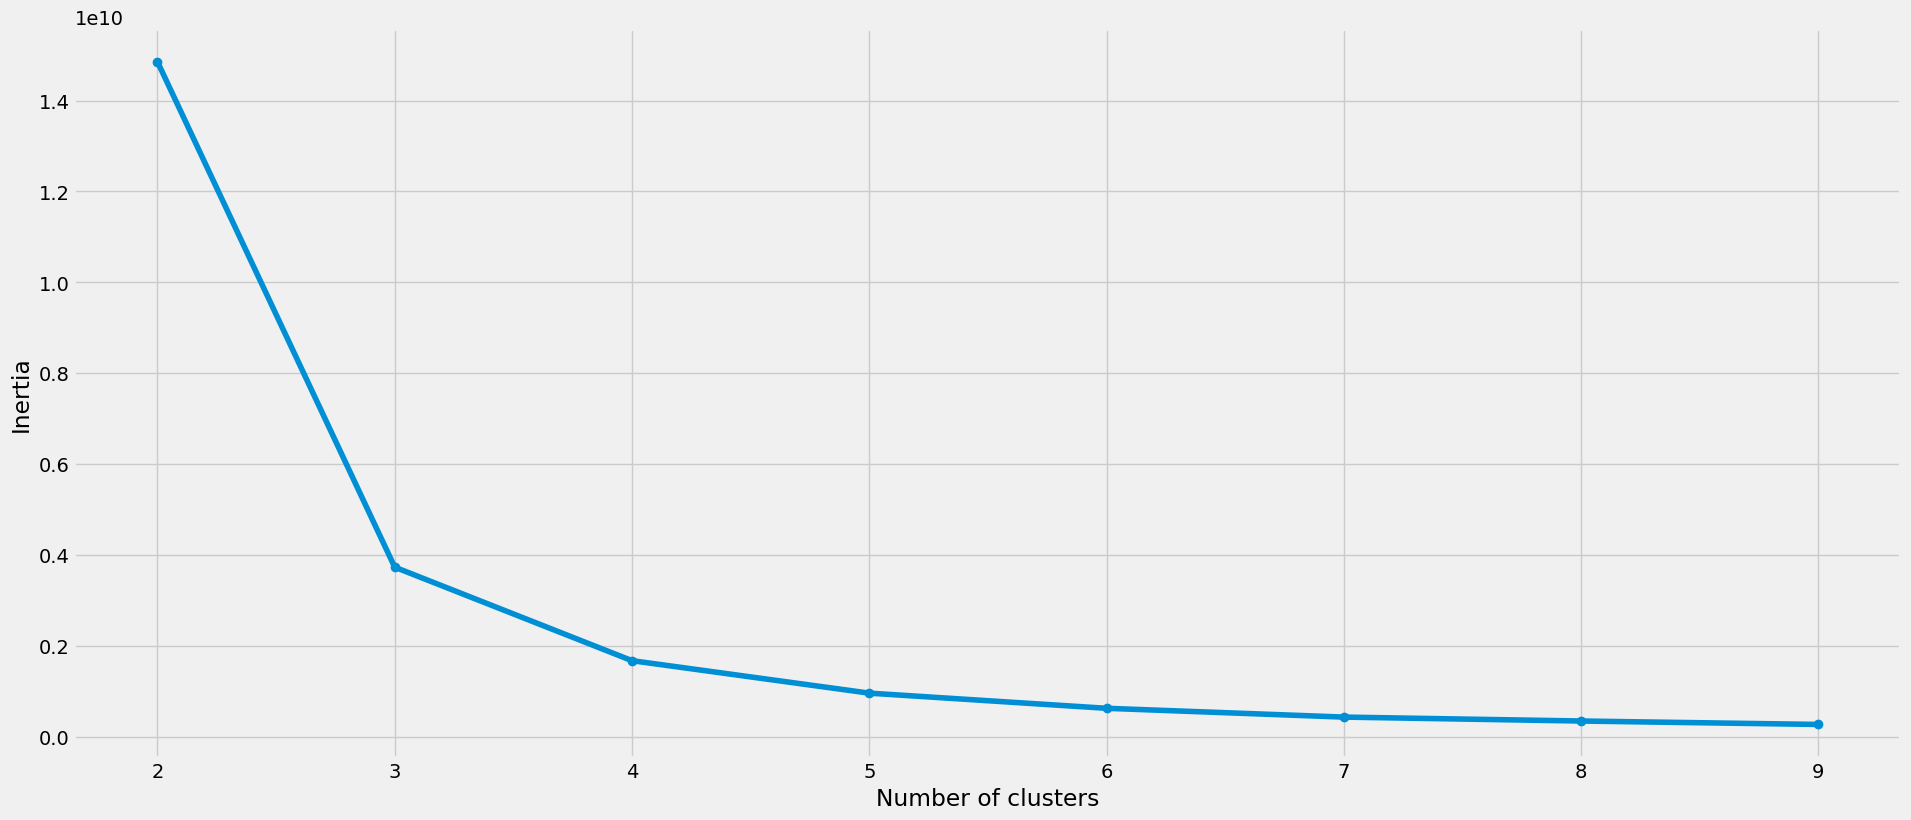

In [33]:
# USE K MEANS
from sklearn.cluster import KMeans
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_clean)
    SSE.append(kmeans.inertia_)

_ = pd.DataFrame({'Cluster':range(2,10, 1), 'SSE':SSE})
plt.figure(figsize=(21,9))
plt.plot(_['Cluster'], _['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
K = 5
kmeans = KMeans(n_clusters = K, init='k-means++')
kmeans.fit(df_clean_scaled)
pred = kmeans.predict(df_clean_scaled)

In [35]:
dff = pd.DataFrame(df_clean_scaled)
dff['cluster'] = pred
dff['CustomerID'] = df_clean['CustomerID']
dff['cluster'].value_counts()

cluster
3    1546
1    1339
0    1184
4     847
2     705
Name: count, dtype: int64

In [36]:
dff

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,cluster,CustomerID
0,2.221618,-0.734185,0.100534,1.470615,-1.146504,0.325189,-1.226744,0.092048,-0.675024,-0.261799,...,1.246883,1.850941,1.585977,-1.302019,-0.386334,-0.681693,0.150884,-0.019783,4,50001.0
1,2.221618,-0.136038,1.509769,-0.714798,-0.906838,1.763906,0.815166,0.092048,0.302891,0.446710,...,1.246883,1.077169,1.585977,-0.188366,-0.924521,-0.681693,-1.249113,-0.021853,4,50002.0
2,2.221618,-0.136038,1.509769,-0.714798,1.729489,0.325189,0.815166,-1.325498,0.302891,0.446710,...,1.246883,0.690283,1.585977,-0.466779,-0.924521,-0.681693,-0.409115,-0.021886,4,50003.0
3,2.221618,-1.212703,1.509769,1.470615,-0.068007,0.325189,0.815166,-1.325498,0.302891,-0.261799,...,1.246883,1.464055,-0.630526,2.038940,-0.924521,-0.681693,-0.409115,-0.021155,4,50004.0
4,2.221618,-1.212703,1.509769,-0.714798,-0.427506,-2.552244,0.815166,0.092048,-0.675024,0.446710,...,1.246883,-0.470375,-0.630526,-1.302019,-0.386334,-0.681693,-0.409115,-0.021392,4,50005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,-0.450122,-0.016409,-1.308701,-0.714798,1.729489,-0.394169,0.815166,0.092048,-1.652938,-0.261799,...,-0.254559,0.690283,-0.630526,0.646874,-0.386334,-0.334484,-0.129116,-0.020272,3,55617.0
5617,-0.450122,0.342479,0.100534,-0.714798,-0.307673,-0.394169,0.815166,0.092048,1.280805,-1.678818,...,-0.254559,0.690283,-0.630526,0.090047,-0.386334,-0.334484,-0.409115,-0.016337,3,55618.0
5618,-0.450122,-1.093074,0.100534,-0.714798,-0.547339,0.325189,0.815166,0.092048,-1.652938,-0.261799,...,-0.254559,-0.470375,1.585977,1.482113,-0.386334,-0.334484,-0.129116,-0.018379,1,55619.0
5619,-0.450122,1.538774,-1.308701,1.470615,-0.787005,-0.394169,0.815166,1.509595,1.280805,-0.261799,...,-0.254559,-0.083489,-0.630526,-0.188366,0.151853,-0.334484,1.270881,-0.018777,0,55620.0


In [37]:
df_enh = pd.merge(dff, df, on='CustomerID')

In [38]:
df_enh.head()

,Churn_x,Tenure_x,PreferredLoginDevice_x,CityTier_x,WarehouseToHome_x,PreferredPaymentMode_x,Gender_x,HourSpendOnApp_x,NumberOfDeviceRegistered_x,PreferedOrderCat_x,...,PreferedOrderCat_y,SatisfactionScore_y,MaritalStatus_y,NumberOfAddress_y,Complain_y,OrderAmountHikeFromlastYear_y,CouponUsed_y,OrderCount_y,DaySinceLastOrder_y,CashbackAmount_y
0,2.221618,-0.734185,0.100534,1.470615,-1.146504,0.325189,-1.226744,0.092048,-0.675024,-0.261799,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,2.221618,-0.136038,1.509769,-0.714798,-0.906838,1.763906,0.815166,0.092048,0.302891,0.446710,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2.221618,-0.136038,1.509769,-0.714798,1.729489,0.325189,0.815166,-1.325498,0.302891,0.446710,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,2.221618,-1.212703,1.509769,1.470615,-0.068007,0.325189,0.815166,-1.325498,0.302891,-0.261799,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,2.221618,-1.212703,1.509769,-0.714798,-0.427506,-2.552244,0.815166,0.092048,-0.675024,0.446710,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [39]:
print(df_enh.columns.tolist())


['Churn_x', 'Tenure_x', 'PreferredLoginDevice_x', 'CityTier_x', 'WarehouseToHome_x', 'PreferredPaymentMode_x', 'Gender_x', 'HourSpendOnApp_x', 'NumberOfDeviceRegistered_x', 'PreferedOrderCat_x', 'SatisfactionScore_x', 'MaritalStatus_x', 'NumberOfAddress_x', 'Complain_x', 'OrderAmountHikeFromlastYear_x', 'CouponUsed_x', 'OrderCount_x', 'DaySinceLastOrder_x', 'CashbackAmount_x', 'cluster', 'CustomerID', 'Churn_y', 'Tenure_y', 'PreferredLoginDevice_y', 'CityTier_y', 'WarehouseToHome_y', 'PreferredPaymentMode_y', 'Gender_y', 'HourSpendOnApp_y', 'NumberOfDeviceRegistered_y', 'PreferedOrderCat_y', 'SatisfactionScore_y', 'MaritalStatus_y', 'NumberOfAddress_y', 'Complain_y', 'OrderAmountHikeFromlastYear_y', 'CouponUsed_y', 'OrderCount_y', 'DaySinceLastOrder_y', 'CashbackAmount_y']


In [40]:
summary = (
    df_enh
    .groupby('cluster')
    .agg(
        nu_obs = ('CustomerID', 'count'),
        avg_tenure = ('Tenure_y', 'mean'),
        avg_warehouse_to_home = ('WarehouseToHome_y', 'mean'),
        avg_hour_spend_on_app = ('HourSpendOnApp_y', 'mean'),
        avg_satisfaction_score = ('SatisfactionScore_y', 'mean'),
        avg_order_amount_hike = ('OrderAmountHikeFromlastYear_y', 'mean'),
        avg_coupon_used = ('CouponUsed_y', 'mean'),
        avg_order_count = ('OrderCount_y', 'mean'),
        avg_day_since_last_order = ('DaySinceLastOrder_y', 'mean'),
        avg_cashback_amount = ('CashbackAmount_y', 'mean'),
        mode_gender = ('Gender_y', lambda x: x.mode()[0]),
        mode_preferred_login_device = ('PreferredLoginDevice_y', lambda x: x.mode()[0]),
        mode_preferred_payment_mode = ('PreferredPaymentMode_y', lambda x: x.mode()[0]),
        mode_prefered_order_cat = ('PreferedOrderCat_y', lambda x: x.mode()[0]),
        mode_marital_status = ('MaritalStatus_y', lambda x: x.mode()[0])
    )
    .reset_index()
    .sort_values('avg_tenure')
)


# Inspect the clusters
## Cluster 0 and 3
They have almost similar amount of tenure, 
cluster 3 spends slightly more time on the app, and has high amount of hike as well as high amount of order count which is an indication of growth (more money spent over time).
On the other hand cluster 0 has lower hike but the highest cashback amount.
## Cluster 1
Has second highest cashback amount, not as loyal as clusters 0,2,3. Spends lowest amount of time on the app and uses lowest amount of coupons. Has the second most cashback amount
## Cluster 2
Highest tenure 11.06, which means highest loyalty, they order the highest and use the most coupons with having slightly higher user satisfaction. And interestingly they buy less frequently compared to others.
## Cluster 4
This is the worst cluster amongst all. Lowest, satisfaction, tenure, order count and cashback.

## Overall
All clusters have same order category, marrital status, payment method, preferred login device and finally gender.

In [41]:
print(summary.head())

   cluster  nu_obs  avg_tenure  avg_warehouse_to_home  avg_hour_spend_on_app  \
4        4     847    8.817839              15.745592               2.950434   
1        1    1337    9.548361              15.391903               2.640777   
0        0    1183   10.503503              15.825858               2.920424   
3        3    1542   10.812210              15.868439               3.135153   
2        2     703   11.065789              15.124638               3.007342   

   avg_satisfaction_score  avg_order_amount_hike  avg_coupon_used  \
4                3.037780              15.878788         1.631450   
1                3.075542              15.341313         1.249804   
0                3.010144              15.599294         1.699822   
3                3.131647              16.021088         1.923442   
2                3.038407              15.717325         2.571644   

   avg_order_count  avg_day_since_last_order  avg_cashback_amount mode_gender  \
4         2.802938     

# Apply statistical methods for filtering significant features

In [42]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
# Decide what Features to keep for training
def test_all_features(df, categorical_cols, numerical_cols, target='Churn', alpha=0.05):
    results = []
    
    # Numerical Features
    for col in numerical_cols:
        if col == target:
            continue
        churn_0 = df[df[target] == 0][col]
        churn_1 = df[df[target] == 1][col]
        
        if len(churn_0) > 0 and len(churn_1) > 0:
            _, p_value = ttest_ind(churn_0, churn_1)
            significant = 'Yes' if p_value < alpha else 'No'
            results.append({'Feature': col, 'Test': 'T-test', 'P_Value': p_value, 'Significant': significant})
    
    # Categorical Features
    for col in categorical_cols:
        contingency = pd.crosstab(df[target], df[col])
        _, p_value, _, _ = chi2_contingency(contingency)
        significant = 'Yes' if p_value < alpha else 'No'
        results.append({'Feature': col, 'Test': 'Chi-square', 'P_Value': p_value, 'Significant': significant})
    
    return pd.DataFrame(results).sort_values('P_Value')

df_features = df_clean.copy()
results = test_all_features(df_features, categorical_cols, numerical_cols)
print(results)
print(f"\nSignificant features: {results[results['Significant']=='Yes']['Feature'].tolist()}")

                        Feature        Test        P_Value Significant
0                        Tenure      T-test  4.000206e-150         Yes
7                      Complain      T-test   4.644857e-81         Yes
15             PreferedOrderCat  Chi-square   6.797507e-60         Yes
16                MaritalStatus  Chi-square   9.650900e-41         Yes
11            DaySinceLastOrder      T-test   4.342190e-32         Yes
13         PreferredLoginDevice  Chi-square   1.358165e-16         Yes
4      NumberOfDeviceRegistered      T-test   6.333351e-16         Yes
5             SatisfactionScore      T-test   2.795835e-15         Yes
14         PreferredPaymentMode  Chi-square   7.685798e-15         Yes
1                      CityTier      T-test   1.801763e-10         Yes
2               WarehouseToHome      T-test   2.284650e-07         Yes
6               NumberOfAddress      T-test   9.504937e-04         Yes
17                       Gender  Chi-square   2.617454e-02         Yes
10    

In [43]:
selected_numerical = [
    'Tenure', 'Complain', 'DaySinceLastOrder', 
    'NumberOfDeviceRegistered', 'SatisfactionScore', 
    'CityTier', 'WarehouseToHome', 'NumberOfAddress', 'Churn'
]

selected_categorical = [
    'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus'
]

selected_features = selected_numerical + selected_categorical

df_clean = df_features[selected_features].copy()

# Model Definition and Training/Test Split

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Hyperopt
import hyperopt
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from hyperopt.pyll.stochastic import sample

# XGboost
import xgboost as xgb

/home/capitan/.venv/tfenv/lib/python3.12/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [45]:
df_clean.columns

Index(['Tenure', 'Complain', 'DaySinceLastOrder', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'CityTier', 'WarehouseToHome', 'NumberOfAddress',
       'Churn', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

df_train = df_clean.copy()
X = df_train.drop(columns=["Churn"])
y = df_train["Churn"]
X_train, X_eval, y_train, y_eval = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [47]:
print(type(y_train))
print(y_train.head())
print(np.unique(y_train))

<class 'pandas.core.series.Series'>
1144    0
2071    0
858     0
4902    0
963     0
Name: Churn, dtype: int64
[0 1]


In [48]:
print("Original counts:\n", y_train.value_counts())
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled counts:\n", y_train.value_counts())

Original counts:
 Churn
0    3739
1     757
Name: count, dtype: int64
Resampled counts:
 Churn
0    3739
1    3739
Name: count, dtype: int64


In [ ]:
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)

N_FOLDS = 10

def objective(params, n_folds = N_FOLDS):
    params['objective'] = 'binary:logistic'

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(
        dtrain=train_dmatrix,
        params=params,
        nfold=n_folds,
        num_boost_round=10000,
        early_stopping_rounds=100, 
        metrics="auc",
        as_pandas=True,
        seed=42
    )

    loss = 1 - cv_results["test-auc-mean"].iloc[-1]
    n_estimators = cv_results["test-auc-mean"].idxmax() + 1
    return {'loss': loss, 'params': params, 'n_estimators': n_estimators, 'status': STATUS_OK}

In [50]:
hyperparameter_space = {
    'n_jobs': -1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 0.8),
    'subsample': hp.uniform('subsample', 0.6, 0.8),
    'min_child_weight': hp.quniform('min_child_weight', 1, 7, 2),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'max_depth': hp.randint('max_depth', 1,16),
    'gamma': hp.uniform('gamma', 0.1,0.4),
    'max_delta_step': hp.randint('max_delta_step',0,10),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2))
}

In [51]:
bayes_trials = Trials()

In [52]:
MAX_EVALS = 10

best = fmin(fn = objective, space = hyperparameter_space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████| 10/10 [04:58<00:00, 29.84s/trial, best loss: 0.0025586986617600616]


# Best Hyperparameters

In [53]:
best

{'colsample_bytree': np.float64(0.6596619049464578),
 'gamma': np.float64(0.159166259699394),
 'learning_rate': np.float64(0.14933740660828285),
 'max_delta_step': np.int64(4),
 'max_depth': np.int64(12),
 'min_child_weight': np.float64(2.0),
 'reg_alpha': np.float64(0.05168057877041543),
 'reg_lambda': np.float64(0.7401484438868229),
 'subsample': np.float64(0.7369343739439782)}

In [54]:
xgb_best = xgb.XGBClassifier(**best, tree_method="hist", enable_categorical=True)

xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.6596619049464578), device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=np.float64(0.159166259699394), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.14933740660828285), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=np.int64(4), max_depth=np.int64(12),
              max_leaves=None, min_child_weight=np.float64(2.0), missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Model Results

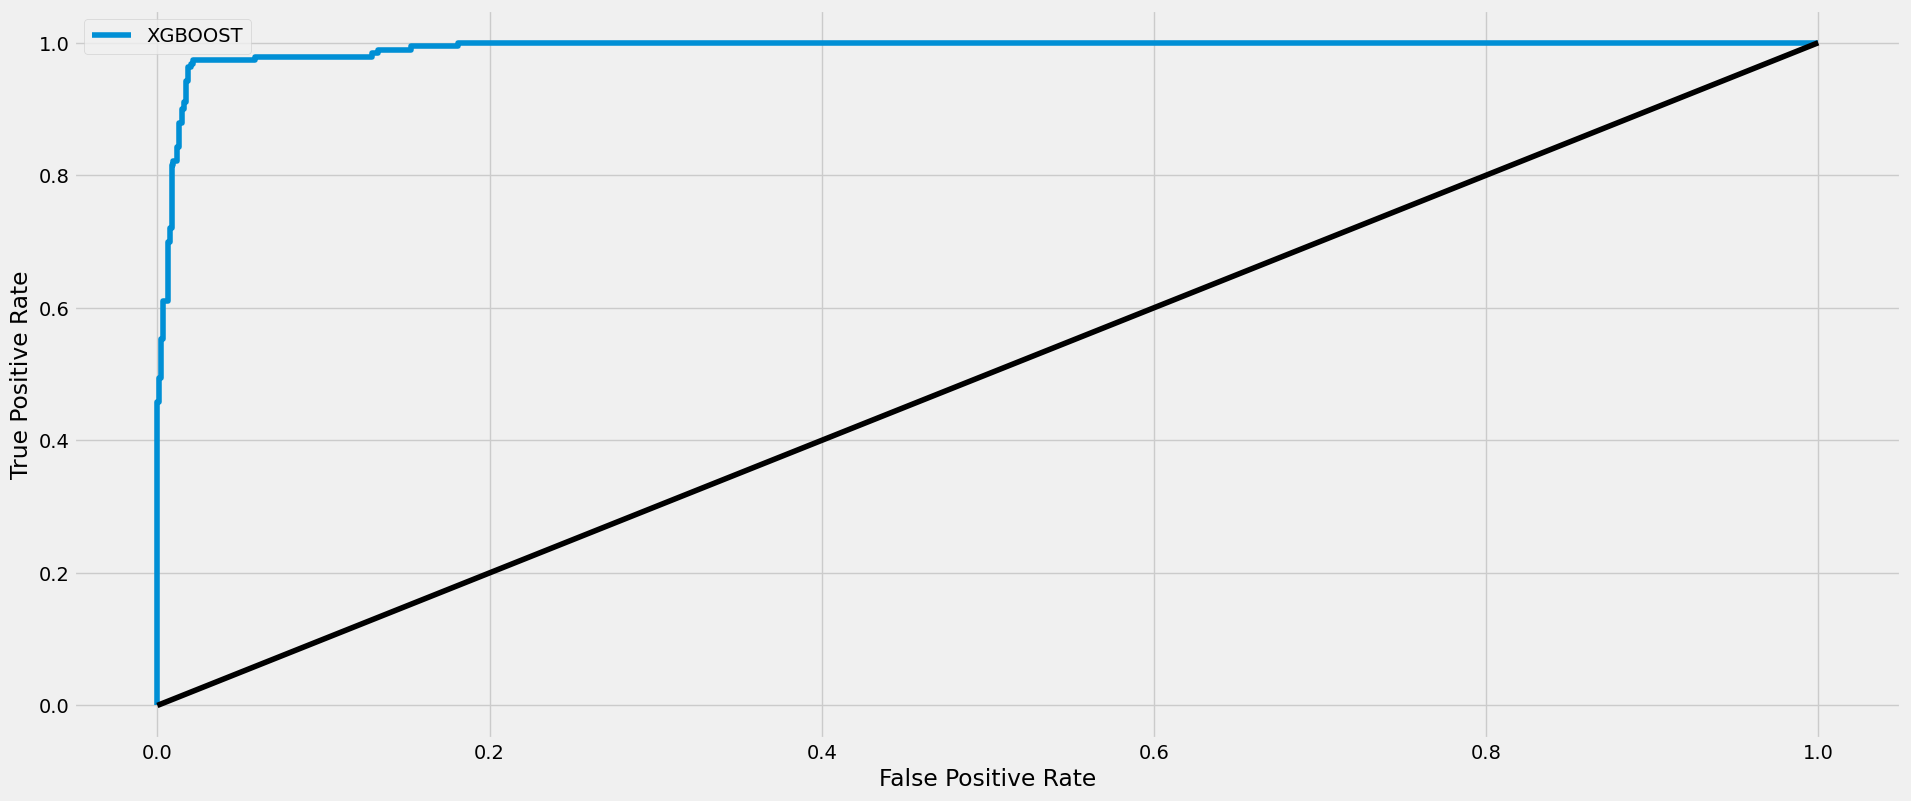

In [ ]:
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, recall_score, precision_score

def add_roc_plot(model, test_x, test_y, legend_text):
    y_pred_prob = model.predict_proba(test_x)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    plt.plot(fpr, tpr, label=legend_text)
    plt.legend()

models_list = [xgb_best]
model_names = ['XGBOOST']

plt.figure(figsize=(21, 9))
[add_roc_plot(model, X_eval, y_eval, legend_text) for model, legend_text in zip(models_list, model_names)]

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k-")
plt.show()
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, recall_score, precision_score

def add_roc_plot(model, test_x, test_y, legend_text):
    y_pred_prob = model.predict_proba(test_x)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    plt.plot(fpr, tpr, label=legend_text)
    plt.legend()

models_list = [xgb_best]
model_names = ['XGBOOST']

plt.figure(figsize=(21, 9))
[add_roc_plot(model, X_eval, y_eval, legend_text) for model, legend_text in zip(models_list, model_names)]

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k-")
plt.show()

In [56]:
list_scores = [roc_auc_score, recall_score, precision_score, accuracy_score]
calc_scores = []
def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]
    
[calc_scores.append(compute_scores(model, X_eval, y_eval, list_scores)) for model in models_list] 

score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame(calc_scores, columns=score_names, index=model_names)

scores_df

,roc_auc,recall,precision,accuracy
XGBOOST,0.97,0.96,0.91,0.98


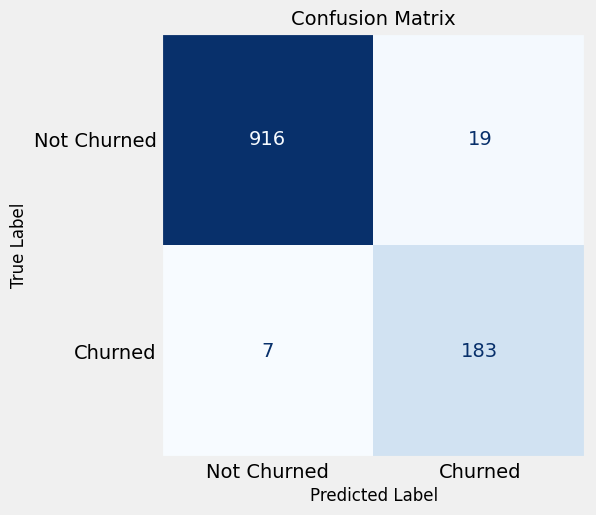

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_eval, xgb_best.predict(X_eval))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churned", "Churned"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", ax=ax, colorbar=False)
ax.grid(False)
ax.set_title("Confusion Matrix", fontsize=14)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
y_true = y_eval
y_pred = xgb_best.predict(X_eval)

print(classification_report(y_true, y_pred, target_names=["Not Churned", "Churned"]))


              precision    recall  f1-score   support

 Not Churned       0.99      0.98      0.99       935
     Churned       0.91      0.96      0.93       190

    accuracy                           0.98      1125
   macro avg       0.95      0.97      0.96      1125
weighted avg       0.98      0.98      0.98      1125



# XAI

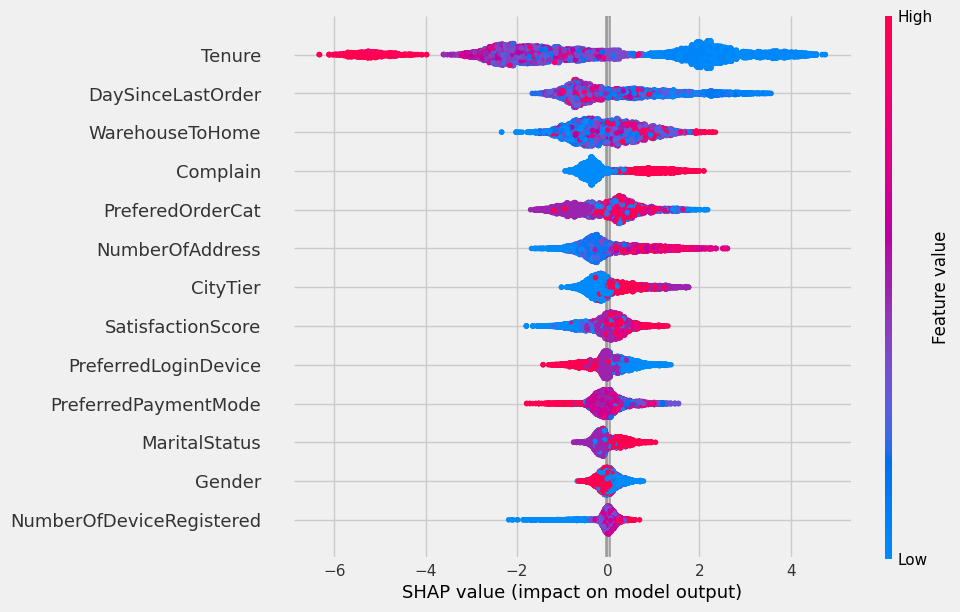

In [57]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(xgb_best)
shap_values =  explainer(X_train)
shap.plots.beeswarm(shap_values, max_display=None)